In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import joblib

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
IMG_SIZE = 227

# Module dùng để load dữ liệu

In [3]:
def load_dataset(path):
    X = np.array([])
    y = np.array([])
    classes = ['NORMAL', 'PNEUMONIA']
    for c in classes:
        files = glob.glob(path + c + "/*.jpeg")
        for f in files:
            print(f)
            img = cv2.imread(f)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            if X.size == 0:
                X = np.array([img])
            else:
                X = np.vstack([X, [img]])
            y = np.append(y, c)
    assert (X.size > 0), 'cannot read file'
    return (X, y)

In [4]:
train_path = 'chest_xray/train/'
dev_path = 'chest_xray/val/'
test_path = 'chest_xray/test/'

X_train, y_train = load_dataset(train_path)
X_dev, y_dev = load_dataset(dev_path)
X_test, y_test = load_dataset(test_path)

chest_xray/train/NORMAL\IM-0115-0001.jpeg
chest_xray/train/NORMAL\IM-0117-0001.jpeg
chest_xray/train/NORMAL\IM-0119-0001.jpeg
chest_xray/train/NORMAL\IM-0122-0001.jpeg
chest_xray/train/NORMAL\IM-0125-0001.jpeg
chest_xray/train/NORMAL\IM-0127-0001.jpeg
chest_xray/train/NORMAL\IM-0128-0001.jpeg
chest_xray/train/NORMAL\IM-0129-0001.jpeg
chest_xray/train/NORMAL\IM-0131-0001.jpeg
chest_xray/train/NORMAL\IM-0133-0001.jpeg
chest_xray/train/NORMAL\IM-0135-0001.jpeg
chest_xray/train/NORMAL\IM-0137-0001.jpeg
chest_xray/train/NORMAL\IM-0140-0001.jpeg
chest_xray/train/NORMAL\IM-0141-0001.jpeg
chest_xray/train/NORMAL\IM-0143-0001.jpeg
chest_xray/train/NORMAL\IM-0145-0001.jpeg
chest_xray/train/NORMAL\IM-0147-0001.jpeg
chest_xray/train/NORMAL\IM-0149-0001.jpeg
chest_xray/train/NORMAL\IM-0151-0001.jpeg
chest_xray/train/NORMAL\IM-0152-0001.jpeg
chest_xray/train/NORMAL\IM-0154-0001.jpeg
chest_xray/train/NORMAL\IM-0156-0001.jpeg
chest_xray/train/NORMAL\IM-0158-0001.jpeg
chest_xray/train/NORMAL\IM-0160-00

# Đọc dữ liệu và trả lời các thông tin

## a) Mục tiêu/ Tác vụ của bộ dữ liệu hướng tới

* Tổng quan về bộ dữ liệu: Phân loại ảnh X-Quang ngực với 2 lớp là Normal đại diện cho bình thường và Pneumonia đại diện cho viêm phổi với ảnh được chọn từ các bệnh nhân trẻ em ở độ tuổi từ 1 đến 5 tuổi
* Mục tiêu, tác vụ có thể hướng tới của bộ dữ liệu: Hỗ trợ chẩn đoán lâm sàng, xây dựng hệ thống AI có khả năng tự động phát hiện viêm phổi dựa trên các ảnh X-Quang cho các bệnh nhân từ 1 đến 5 tuổi

## b) Kích thước của dữ liệu là bao nhiêu trên tập train, dev và test?

In [5]:
print('Shape of Training Set:')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print('======================')
print('Shape of Dev set')
print(f'X_dev: {X_dev.shape}')
print(f'y_dev: {y_dev.shape}')
print('======================')
print('Shape of Test set:')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

Shape of Training Set:
X_train: (5216, 227, 227, 3)
y_train: (5216,)
Shape of Dev set
X_dev: (16, 227, 227, 3)
y_dev: (16,)
Shape of Test set:
X_test: (624, 227, 227, 3)
y_test: (624,)


## c) Phân bố nhãn trên từng tác vụ trên tập train, dev và test. Vẽ biểu đồ barplot thể hiện phân bố nhãn trên tập dữ liệu

### Ánh xạ nhãn NORMAL -> 0, PNEUMONIA -> 1

In [6]:
y_train = np.where(y_train == 'NORMAL', 0, 1)
y_dev = np.where(y_dev == 'NORMAL', 0, 1)
y_test = np.where(y_test == 'NORMAL', 0, 1)

In [7]:
train_counts = np.bincount(y_train)
dev_counts = np.bincount(y_dev)
test_counts = np.bincount(y_test)

print('Label Distribution in: ')
print('=' * 10)
print('Training Set')
print(f'Normal: {train_counts[0]}')
print(f'Pneumonia: {train_counts[1]}')
print('=' * 10)
print('Dev Set')
print(f'Normal: {dev_counts[0]}')
print(f'Pneumonia: {dev_counts[1]}')
print('=' * 10)
print(f'Testing Set')
print(f'Normal: {test_counts[0]}')
print(f'Pneumonia: {test_counts[1]}')

Label Distribution in: 
Training Set
Normal: 1341
Pneumonia: 3875
Dev Set
Normal: 8
Pneumonia: 8
Testing Set
Normal: 234
Pneumonia: 390


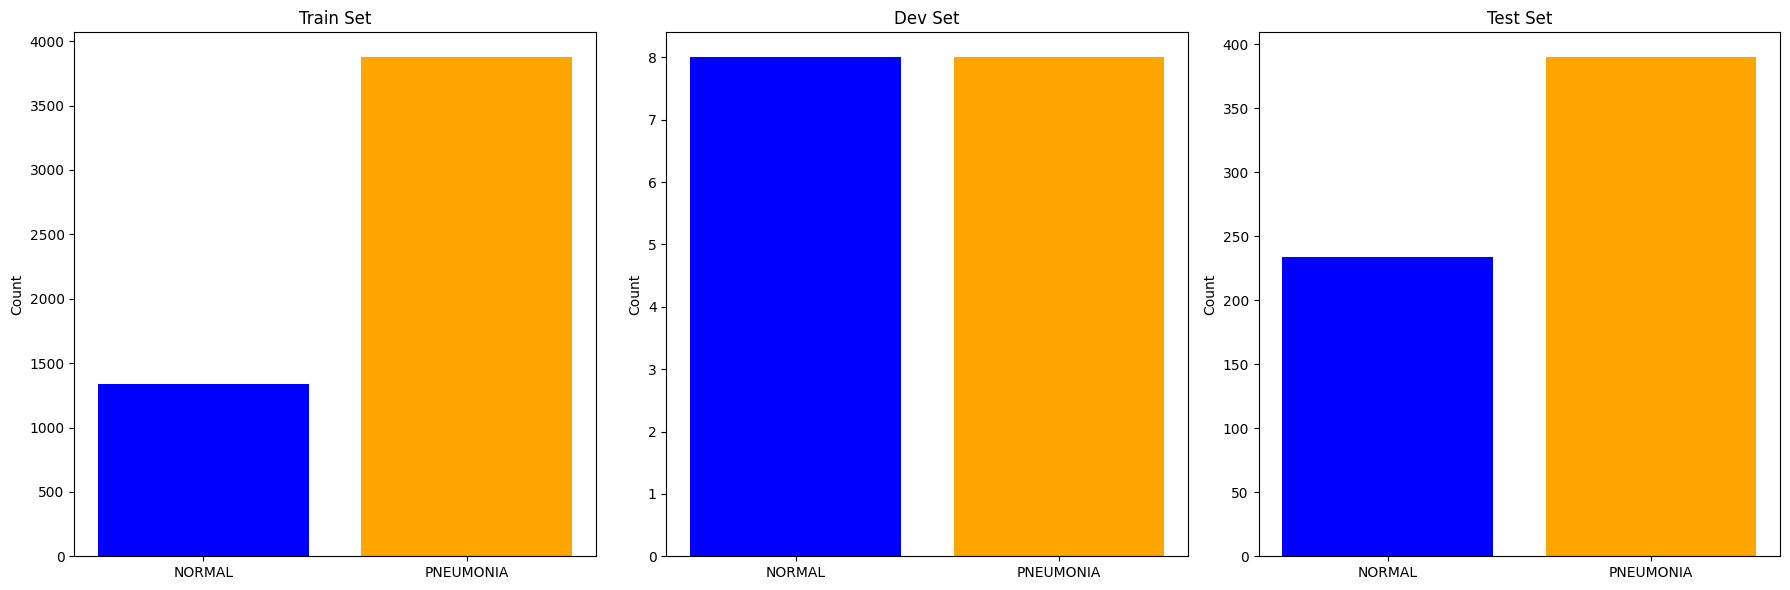

In [8]:
labels = ['NORMAL', 'PNEUMONIA']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].bar(labels, train_counts, color=['blue', 'orange'])
axes[0].set_title('Train Set')
axes[0].set_ylabel('Count')

axes[1].bar(labels, dev_counts, color=['blue', 'orange'])
axes[1].set_title('Dev Set')
axes[1].set_ylabel('Count')

axes[2].bar(labels, test_counts, color=['blue', 'orange'])
axes[2].set_title('Test Set')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

## d) Hiển thị khoảng 3 bức hình về ảnh X-Quang phổi lên màn hình

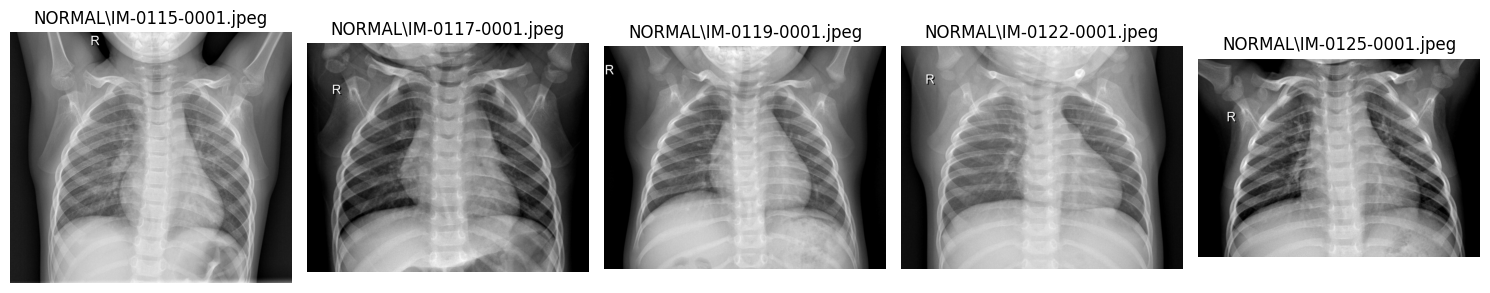

In [9]:
image_paths = glob.glob('chest_xray/train/NORMAL/*.jpeg')[:5]

images = [cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB) for img_path in image_paths]


fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for ax, img, path in zip(axes, images, image_paths):
    ax.imshow(img)
    ax.set_title(path.split('/')[-1])
    ax.axis('off')

plt.tight_layout()
plt.show()

# Huấn luyện mô hình bằng phương pháp Logistic Regression

In [10]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_dev_flattened = X_dev.reshape(X_dev.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_dev_scaled = scaler.transform(X_dev_flattened)
X_test_scaled = scaler.transform(X_test_flattened) 

In [11]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [12]:
y_pred_dev = lr.predict(X_dev_scaled)
dev_acc = accuracy_score(y_dev, y_pred_dev)
dev_cm = confusion_matrix(y_dev, y_pred_dev)
print(f'Accuracy Score on Dev Set:{dev_acc}')
print('Confusion Matrix')
print(dev_cm)

Accuracy Score on Dev Set:0.875
Confusion Matrix
[[6 2]
 [0 8]]


In [13]:
y_pred_test = lr.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_pred_test)
test_cm = confusion_matrix(y_test, y_pred_test)
print(f'Accuracy Score on test Set:{test_acc}')
print('Confusion Matrix')
print(test_cm)

Accuracy Score on test Set:0.7740384615384616
Confusion Matrix
[[105 129]
 [ 12 378]]


# Huấn luyện mô hình bằng phương pháp SVM

In [14]:
svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC()

In [15]:
y_pred_dev = svm.predict(X_dev_scaled)
dev_acc = accuracy_score(y_dev, y_pred_dev)
dev_cm = confusion_matrix(y_dev, y_pred_dev)
print(f'Accuracy Score on Dev Set:{dev_acc}')
print('Confusion Matrix')
print(dev_cm)

Accuracy Score on Dev Set:0.75
Confusion Matrix
[[4 4]
 [0 8]]


In [16]:
y_pred_test = svm.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_pred_test)
test_cm = confusion_matrix(y_test, y_pred_test)
print(f'Accuracy Score on test Set:{test_acc}')
print('Confusion Matrix')
print(test_cm)

Accuracy Score on test Set:0.7772435897435898
Confusion Matrix
[[100 134]
 [  5 385]]


In [ ]:
joblib.dump(lr, 'LR_Pneumonia_Prediction.pkl')
joblib.dump(svm, 'SVM_Pneumonia_Prediction.pkl')

['SVM_Pneumonia_Prediction.pkl']